In [ ]:
# 수익률의 표준편자는 자산가격이 평균값에서 벗어나는 정도, 즉 리스크를 측정하는 방법
# 주식시장에서의 리스크는 흔히 주가의 변동성을 의미한다. 

# 효율적 투자선 : 현대 포트폴리오 이론의 핵심 개념으로서 투자자가 인내할수 있는 리스크 수준에서 최상의 기대수익률을 제공하는 포트폴리오들의 집합을 나타냄

In [4]:
# 시총 상위 4종목으로 효율적 투자선 구하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
stocks = ['삼성전자','SK하이닉스','현대자동차','NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2021-02-08', '2021-06-08')['close']

print(df)

daily_ret = df.pct_change()  # 4종목의 일간 변동률
annual_ret = daily_ret.mean() # 연간 수익률 252 는 미국의 1년 평균 개장일
daily_cov = daily_ret.cov()  # 일간 리스트 cov() :일간 변동률의 공분산
annual_cov = daily_cov * 252 # 연간 공분산은 일간 공분산에 252를 곱하여 계산한다.


# 몬테카를로 시뮬레이션
# 시총 4위 종목으로 구성된 포트폴링 20000개를 생성한다. 
# 넘파이의 random()함수를 사용헤 각 포트폴리오에 포함된 4종목의 비중이 모두 다르게 함.
# 매우 많은 난수를 이용해 함수의 값을 확률적으로 계산하는 것을 몬테카를로 시뮬레이션이라고 한다.

port_ret=[]
port_risk=[]
port_weights = []
sharp_ratio = []

for _ in range(20000):
    weights = np.random.random(len(stocks)) # 4개의 랜덤숫자로 구성된 배열
    weights /= np.sum(weights)  # 4종목 비중의 합이 1이 되도록 조정

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns': port_ret, 'Risk' : port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]

df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

             삼성전자  SK하이닉스   현대자동차   NAVER
date                                     
2021-05-31  80500  127000  235000  362500
2021-06-01  80600  128500  237000  367000
2021-06-02  80800  126000  238000  363000
2021-06-03  82800  129000  238500  362000
2021-06-04  82200  128500  241500  357000
2021-06-07  81900  128500  241500  362500
2021-06-08  81900  127500  243500  362500


In [ ]:
# 샤프지수 = 포트폴리오 예상 수익률 - 무위험률 / 수익률의 표준편차

# 보조지표 : 이동평균선, 일목균형표 , 볼린저밴드 , 매물대, 상대강도지수, 이동평균 수렴확산 등 이 가장 많이 사용하는 지표

# 볼린저 밴드는 주가의 20일 이동 평균선을 기준으로 상대적인 고점을 나타내는 상단 밴드와 상대적인 저점을 나타내는 하단 밴드로 구성
# 따라서 주가가 상단 밴드 근처에 있을 수록 상대적인 고점에
# 주가가 하단 밴드 근처에 있을 수록 상대적인 저점에 있다고 판단한다.

end_date is initialized to '2021-06-13'
Empty DataFrame
Columns: [code, date, open, high, low, close, diff, volume, MA20, stddev, upper, lower]
Index: []


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

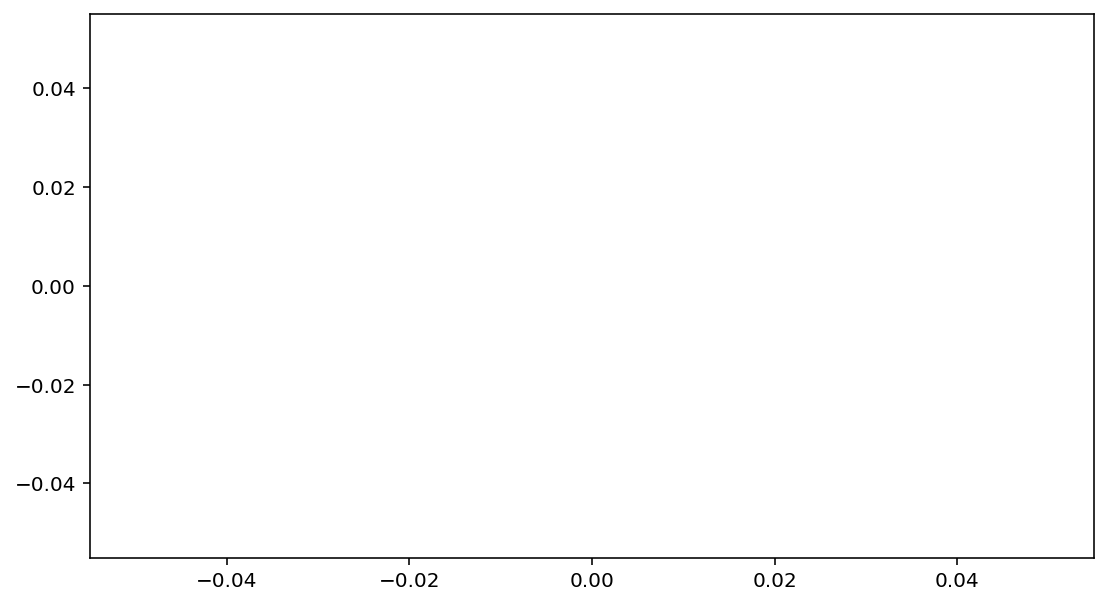

In [8]:
# 볼린저밴드
import matplotlib.pyplot as plt
from Investar import Analyzer

mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2021-02-08')

df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] + (df['stddev'] * 2)
df = df[19:]

print(df)
plt.figure(figsize=(9,5))
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label="Upper band")
plt.plot(df.index, df['MA20'], 'k--', label="Moving average 20")
plt.plot(df.index, df['lower'], 'c--', label="Lower band")
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best')
plt.title('Naver bollinger band(20 day, 2std)')
plt.show()

In [1]:
from Investar import DBUpdaterStockCode

DBUpdaterStockCode.update_stock_code()

업데이트 시작
lastpage : 461
pages : 1


'완료'